In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2

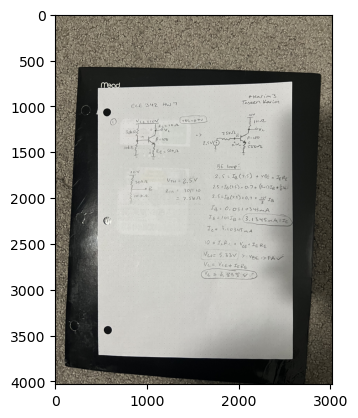

In [3]:
#def input(path=None):
    #image = plt.imread(path)
   # plt.imshow(image)
imaage = plt.imread('image.JPG')
plt.imshow(imaage)
plt.show()


In [15]:
def gaussian_kernel(size, sigma=1):
    kernel = np.zeros((size, size))
    center = size // 2
    for i in range(size):
        for j in range(size):
            x, y = i - center, j - center
            kernel[i, j] = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
    return kernel / (2 * np.pi * sigma ** 2)
def gaussian_blur(image, size=5, sigma=1.4):
    kernel = gaussian_kernel(size, sigma)
    filtered_image = np.zeros_like(image)
    image_padded = np.pad(image, ((size//2, size//2), (size//2, size//2)), mode='constant')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            filtered_image[i, j] = np.sum(kernel * image_padded[i:i+size, j:j+size])
    return filtered_image

In [5]:
def sobel_filter(img, axis):
    if axis == 'x':
        kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    elif axis == 'y':
        kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    else:
        raise ValueError("Invalid axis parameter. Must be 'x' or 'y'.")

    padded_img = np.pad(img, 1, mode='edge')
    output = np.zeros_like(img)

    for i in range(1, img.shape[0] + 1):
        for j in range(1, img.shape[1] + 1):
            output[i-1, j-1] = np.sum(padded_img[i-1:i+2, j-1:j+2] * kernel)

    return output

In [20]:
def canny_edge_detector(image, low_threshold=None, high_threshold=None):
    # Convert the image to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian filter to the image
    image = gaussian_blur(image, size=5, sigma=1.4)
    
    # Compute the gradient of the image using Sobel operator
    Gx = sobel_filter(image, 'x')
    Gy = sobel_filter(image, 'y')
    
    # Compute the magnitude and direction of gradient
    magnitude = np.sqrt(Gx ** 2 + Gy ** 2)
    angle = np.arctan2(Gy, Gx)
    
    #setting the minimum and maximum thresholds for double thresholding
    mag_max=np.max(magnitude)
    if not low_threshold:low_threshold=mag_max*0.1
    if not high_threshold:high_threshold=mag_max*0.5   
    height,width=image.shape
    
    for i in range(width):
        for j in range(height):
            
            grad_ang=angle[j,i]
            grad_ang=abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)
            
            #selecting the neigbours of the target pixel according to the gradient direction
            if grad_ang<=22.5:
                neighb_1_x,neighb_1_y=i-1,j
                neighb_2_x,neighb_2_y=i+1,j
            elif grad_ang>22.5 and grad_ang<=(22.5+45):
                neighb_1_x,neighb_1_y=i-1,j-1
                neighb_2_x,neighb_2_y=i+1,j+1
            elif grad_ang>(22.5+45) and grad_ang<=(22.5+90):
                neighb_1_x,neighb_1_y=i,j-1
                neighb_2_x,neighb_2_y=i,j+1
            elif grad_ang>(22.5+90) and grad_ang<=(22.5+135):
                neighb_1_x,neighb_1_y=i-1,j+1
                neighb_2_x,neighb_2_y=i+1,j-1
            elif grad_ang>(22.5+135) and grad_ang<=(22.5+180):
                neighb_1_x,neighb_1_y=i-1,j
                neighb_2_x,neighb_2_y=i+1,j
            
            #Non-maximum supression step
            if width>neighb_1_x>=0 and height>neighb_1_y>=0:
                if magnitude[j,i]<magnitude[neighb_1_y,neighb_1_x]:
                    magnitude[j,i]=0
                    continue

            if width>neighb_2_x>=0 and height>neighb_2_y>=0:
                if magnitude[j,i]<magnitude[neighb_2_y,neighb_2_x]:
                    magnitude[j,i]=0

    weak_ids= np.zeros_like(image)
    strong_ids= np.zeros_like(image)              
    ids= np.zeros_like(image)
    
    #double thresholding step
    for i in range(width):
        for j in range(height):
            grad_mag=magnitude[j,i]
            if grad_mag<low_threshold:
                magnitude[j,i]=0
            elif high_threshold>grad_mag>=low_threshold:
                ids[j,i]=1
            else:
                ids[j,i]=2
    return magnitude    

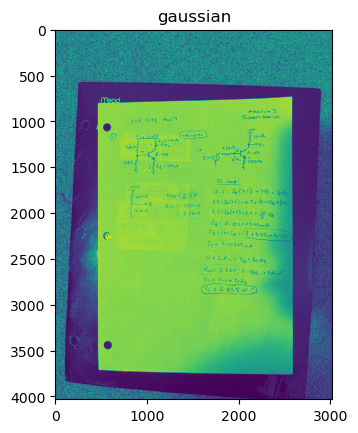

In [21]:
image = cv2.cvtColor(imaage, cv2.COLOR_BGR2GRAY)
gauss = gaussian_blur(image)
plt.imshow(gauss)
plt.title("gaussian")
plt.show()

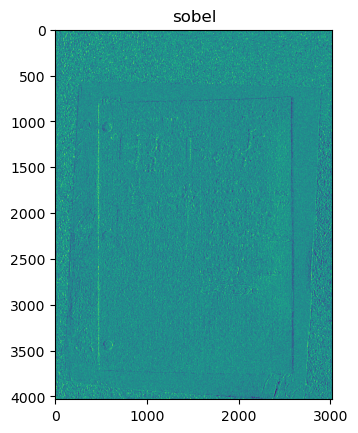

In [22]:
image = cv2.cvtColor(imaage, cv2.COLOR_BGR2GRAY)
sobelx = sobel_filter(image, 'x')
plt.imshow(sobelx)
plt.title("sobel")
plt.show()

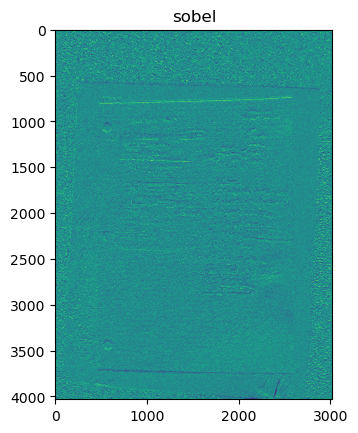

In [24]:
image = cv2.cvtColor(imaage, cv2.COLOR_BGR2GRAY)
sobely = sobel_filter(image, 'y')
plt.imshow(sobely)
plt.title("sobel")
plt.show()

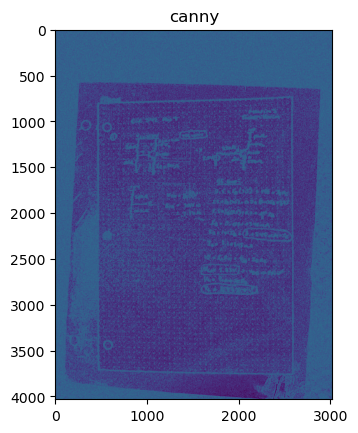

In [25]:
canny = canny_edge_detector(imaage)
plt.imshow(canny)
plt.title("canny")
plt.show()

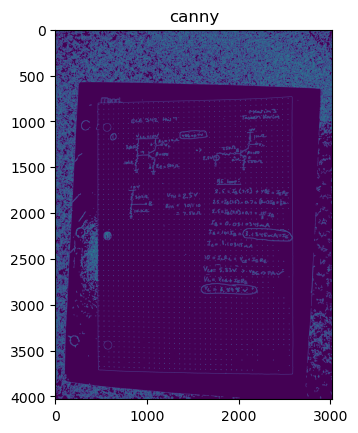

In [26]:
canny = cv2.Canny(imaage,75,200)
plt.imshow(canny)
plt.title("canny")
plt.show()